# *k*-Means Clustering [Unsupervised Learning]

### Satisfies Two Properties:

1. Each observation belongs to at least one cluster
2. No observations belongs to more than one cluster

e.g. if the $i^{th}$ observation belongs to the $k^{th}$ cluster, then $i \in C_k$ where $k \in \{1, \ldots, K\}$

#### Model Inputs

1. $i$: observations, where $i \geq k$
2. $j$: features, where $j \geq 1$
3. $k$: the desired numbed of clusters


### Model Objective

To assign all observations to one and only one cluster, such that *within-cluster variation* is **minimized**

A typical way to evaluate *within-cluster variation* is to compute the sum-of-squares (SSE) for each cluster and sum for all cluster. This isalso known as Within-Cluster Sum-of-Squares (WSS).

$SSE = WSS = \sum_k \sum_{x \in C_k} (x - \gamma_k)$

where 

$k \in \{1,\ldots,K\}$ (number of clusters)

$x$ an observation in cluster $k$

$\gamma_k$ the centroid of cluster $k$

In this context, SSE/WSS is referred to as **Cohesion**. There are many other measuers of *within-cluster variation*, but the above measure is very common. 

In sum, the objective is 

$$\min \sum_k \sum_{x \in C_k} (x - \gamma_k)$$

### The Algorithm

Just as there are many ways to evaluate and assign observations to clusters, there are many ways to initialize and improve clusters. We will discuss two algorithms here.

#### Algorithm 1

**INPUT**: $K$, the number of desired clusters 

1. Randomly assign each observation to a cluster 

2. Iterate until the clusters converge, i.e., there are no more observations switching between clusters
    
    1. For each cluster, compute the cluster centroid, $\gamma_k$
       
    2. Assign each observation to the closest centroid


#### Algorithm 2

**INPUT**: $K$, the number of desired clusters 

1. Randomly select $K$ observations as cluster centroids

2. Iterate until the clusters converge, i.e., there are no more observations switching between clusters
    
    1. Assign each observation to the closest centroid
    
    2. For each cluster, compute the cluster centroid, $\gamma_k$

The above algorithms are typically run hundreds of times and the solution with the lowest SSE selected.

![title](good_kmeans.png)

## SKL Python Code

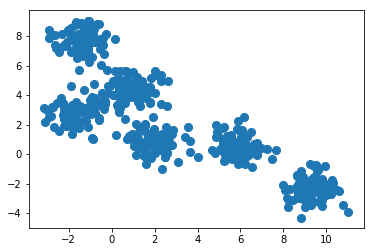

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

# 修改cluster_std和random_state应该可以得到不同的随机聚簇效果
X, y_true = make_blobs(n_samples = 500, centers = 6, cluster_std = 0.7, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s = 65);

In [11]:
X[0:5,]

array([[ 8.92394356, -2.31622377],
       [ 1.55154445,  0.32856857],
       [-0.25216733,  8.11272063],
       [ 5.59092746, -0.36947381],
       [-1.41766966,  8.89824283]])

In [12]:
y_true #these are the true cluster labels 

array([4, 1, 3, 5, 3, 2, 2, 0, 1, 2, 4, 3, 0, 2, 0, 0, 4, 4, 1, 2, 5, 0, 3,
       5, 3, 0, 3, 2, 4, 1, 5, 3, 0, 0, 1, 2, 4, 1, 1, 0, 5, 4, 1, 2, 4, 1,
       5, 4, 5, 1, 4, 1, 3, 1, 0, 1, 2, 2, 5, 1, 3, 5, 4, 1, 0, 1, 2, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 4, 0, 4, 4, 5, 5, 4, 5, 2, 0, 0, 4, 2, 5, 0, 0,
       3, 5, 2, 5, 3, 3, 2, 4, 3, 3, 0, 1, 1, 2, 3, 4, 4, 5, 5, 2, 1, 0, 5,
       1, 1, 5, 4, 4, 2, 1, 3, 4, 2, 0, 2, 2, 0, 4, 1, 5, 5, 2, 1, 0, 4, 2,
       5, 5, 5, 0, 2, 1, 4, 4, 2, 1, 5, 3, 3, 5, 0, 0, 2, 4, 2, 2, 1, 0, 0,
       4, 4, 2, 5, 3, 0, 1, 1, 2, 1, 4, 3, 3, 1, 5, 3, 5, 4, 3, 5, 0, 3, 1,
       3, 4, 5, 2, 4, 1, 1, 4, 5, 3, 2, 3, 3, 2, 4, 4, 5, 5, 5, 1, 3, 0, 4,
       4, 1, 3, 5, 2, 0, 5, 4, 0, 4, 2, 4, 3, 1, 1, 0, 2, 3, 3, 5, 5, 0, 2,
       3, 4, 3, 1, 5, 0, 4, 4, 2, 4, 5, 4, 0, 1, 0, 3, 5, 1, 1, 5, 4, 2, 0,
       5, 0, 2, 1, 0, 3, 0, 3, 4, 3, 3, 3, 1, 0, 2, 5, 2, 2, 0, 0, 3, 2, 1,
       4, 2, 3, 2, 5, 4, 3, 1, 1, 2, 0, 2, 3, 2, 4, 4, 2, 1, 0, 0, 1, 5, 4,
       2, 3,

#### Run KMeans Algorithm

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [16]:
y_kmeans

array([0, 4, 2, 3, 2, 5, 5, 1, 4, 5, 0, 2, 1, 5, 1, 1, 0, 0, 4, 5, 3, 1, 2,
       3, 2, 1, 2, 5, 0, 4, 3, 2, 1, 1, 4, 5, 0, 4, 4, 1, 3, 0, 4, 5, 0, 4,
       3, 0, 3, 4, 0, 4, 2, 4, 1, 4, 5, 5, 3, 4, 2, 3, 0, 4, 1, 4, 5, 4, 4,
       5, 4, 5, 1, 2, 5, 5, 0, 1, 0, 0, 3, 3, 0, 3, 5, 1, 1, 0, 5, 3, 1, 1,
       2, 3, 5, 3, 2, 2, 5, 0, 2, 2, 1, 4, 4, 5, 2, 0, 0, 3, 3, 5, 4, 1, 3,
       4, 4, 3, 0, 0, 5, 4, 2, 0, 5, 1, 5, 5, 1, 0, 4, 3, 3, 5, 4, 1, 0, 5,
       3, 3, 3, 1, 5, 4, 0, 0, 5, 4, 3, 2, 2, 3, 1, 1, 5, 0, 5, 5, 4, 1, 1,
       0, 0, 5, 3, 2, 1, 4, 4, 5, 4, 0, 2, 2, 4, 3, 2, 3, 0, 2, 3, 1, 2, 4,
       2, 0, 3, 1, 0, 4, 4, 0, 3, 2, 5, 2, 2, 5, 0, 0, 3, 3, 3, 4, 2, 1, 0,
       0, 4, 2, 3, 5, 1, 3, 0, 1, 0, 5, 0, 2, 4, 4, 1, 5, 2, 2, 3, 3, 1, 5,
       2, 0, 2, 4, 3, 1, 0, 0, 5, 0, 3, 0, 1, 4, 1, 2, 3, 4, 4, 3, 0, 5, 1,
       3, 1, 5, 4, 1, 2, 1, 2, 0, 2, 2, 2, 4, 1, 5, 3, 5, 5, 1, 1, 2, 5, 4,
       0, 5, 2, 5, 3, 0, 2, 4, 4, 5, 1, 5, 2, 5, 0, 0, 5, 4, 1, 1, 4, 3, 0,
       1, 2,

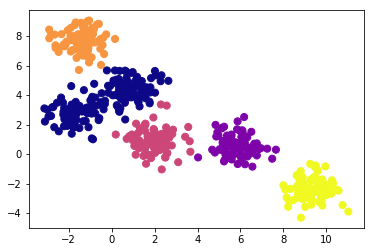

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='plasma')

In [20]:
# 使用这个就可以看到每种cluster（即k为特定值）时的SSE
# 总体有个趋势，比如你一共有10个sample data，那么k=0时SSE最大，k=10时SSE最小（此时每个点每个sample data都是自己的centroid）
# 所以总是k越接近于总的sample data数，SSE最小
# k越大，SSE最小
# 所以你可以像下面第104行那样，看SSE啥时候开始减小的scale很小了，即你再增大k、SSE的减小幅度也不会更大了，那么此时的k就是最优的，可以用GridSearchCV实现
kmeans.inertia_

825.3578551675962

With K = 3, will SSE go up or down?

In [26]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(X)
#y_kmeans = kmeans.predict(X)
kmeans.inertia_

465.78762042171786

With K = 5, will SSE go up or down?

In [91]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)
#y_kmeans = kmeans.predict(X)
kmeans.inertia_

43.005198671637032

### What if we don't know how many clusters there are? 

Plot SSE (y-axis) against number of clusters (x-axis) and try to identify the point of diminishing returns to scale (also called the elbow method)

In [27]:
km = [KMeans(n_clusters = i) for i in range(1, 30)]

In [28]:
score = [km[i].fit(X).inertia_ for i in range(len(km))]

In [29]:
score

[13113.342371364937,
 4153.5076750321023,
 2373.7172979352626,
 1407.9464132980179,
 825.3578551675962,
 465.78762042171786,
 426.51882295876658,
 398.46580584206004,
 372.02761321997502,
 345.73804218899045,
 322.22824423619102,
 298.99698849391211,
 279.62860342921653,
 255.45045379235302,
 240.7432142987256,
 221.65005257127729,
 215.54905175564033,
 193.09386936957989,
 183.82542014948621,
 179.04256268584697,
 169.80006490863428,
 164.19846300155109,
 157.72214918265001,
 150.98817932479034,
 145.93824043043804,
 138.58204106476194,
 136.337592908565,
 131.56299564693813,
 126.49755712685733]

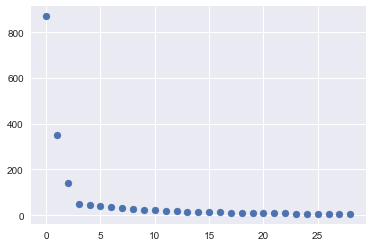

In [104]:
plt.scatter(x = list(range(len(score))),  y = score)

### Potential Issues with K-Means

#### 1. Initial Centroid Selection

![title](badCentroids.png)

#### 2. Differing Sizes of Clusters

![](diff.png)

#### 3. Differing Density of Clusters

![](density.png)

#### 4. Non-Globular Shapes

![](globular.png)